<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Ejercicios_de_probabilidad_y_simulaci%C3%B3n_de_distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Compruebe los resultados teóricos obtenidos utilizando un programa de que simule ambos ejercicios. Repita el problema un número suficientemente grande de veces y determine con que precisión el resultado teórico puede ser corroborado experimentalmente.

In [4]:
import numpy as np

# Número de simulaciones
N = 1000000

# Simulación de dos dados
dado1 = np.random.randint(1, 7, N)
dado2 = np.random.randint(1, 7, N)
suma = dado1 + dado2

# Probabilidades
p_suma7 = np.mean(suma == 7)
p_suma_mayor10 = np.mean(suma > 10)

print(f"P(suma=7)  = {p_suma7:.3f}")
print(f"P(suma>10) = {p_suma_mayor10:.3f}")



P(suma=7)  = 0.167
P(suma>10) = 0.083


## 4. Considere los procedimientos rand0, rand1, rand2 y rand3 de la sección 7.1 “Uniform Deviates” del libro: Numerical Recipes in C : The Art of Scientific Computing by William H. Press, Brian P. Flannery, Saul A. Teukolsky, William T. Vetterling, Second Edition (available online). Implemente los 4 procedimientos en lenguaje/software de su preferencia y muestre a través de histogramas que efectivamente producen una distribución uniforme. Indique cuál de los 4 procedimientos produce mejores secuencias pseudoaleatorias. Explique todas sus conclusiones.

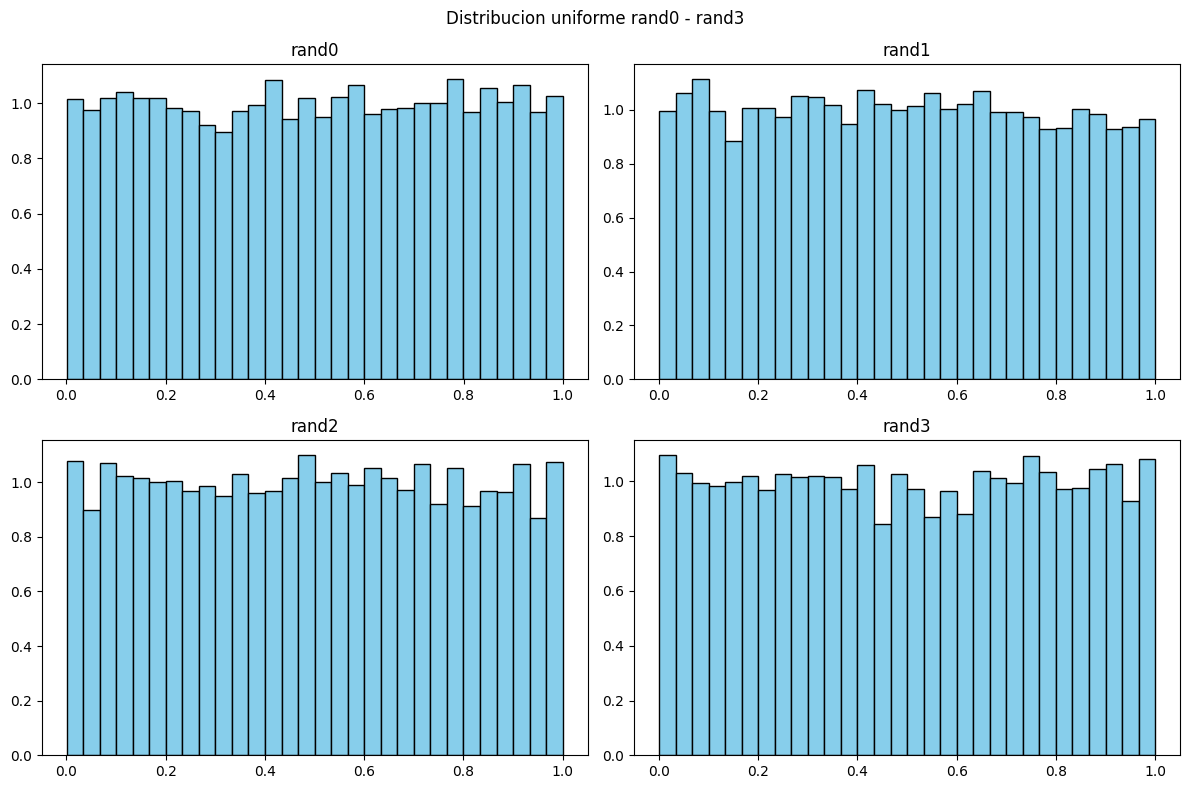

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# rand0 generador basico
def rand0(seed, n=10000):
    a = 1664525
    c = 1013904223
    m = 2**32
    x = seed
    numeros = []
    for _ in range(n):
        x = (a * x + c) % m
        numeros.append(x / m)
    return np.array(numeros)

# rand1 con mezcla
def rand1(seed, n=10000):
    a = 1103515245
    c = 12345
    m = 2**31
    x = seed
    tabla = []
    for _ in range(97):
        x = (a * x + c) % m
        tabla.append(x)
    numeros = []
    for _ in range(n):
        j = int(97 * x / m)
        x = (a * x + c) % m
        r = tabla[j] / m
        tabla[j] = x
        numeros.append(r)
    return np.array(numeros)

# rand2 tipo park miller
def rand2(seed, n=10000):
    a = 16807
    m = 2147483647
    q = m // a
    r = m % a
    x = seed
    numeros = []
    for _ in range(n):
        x = a * (x % q) - r * (x // q)
        if x < 0:
            x += m
        numeros.append(x / m)
    return np.array(numeros)

# rand3 mejor version
def rand3(seed, n=10000):
    m = 714025
    ia = 1366
    ic = 150889
    ma = np.zeros(56)
    x = seed
    for i in range(55, 0, -1):
        x = (ia * x + ic) % m
        ma[i] = x
    numeros = []
    mj = 0
    for _ in range(n):
        mj = (mj + 1) % 55
        mk = (mj + 31) % 55
        ma[mj] = (ma[mj] - ma[mk]) % m
        numeros.append(ma[mj] / m)
    return np.array(numeros)

# lista de funciones y nombres
generadores = [rand0, rand1, rand2, rand3]
nombres = ["rand0", "rand1", "rand2", "rand3"]
semillas = [123, 456, 789, 101112]

# graficar histogramas
plt.figure(figsize=(12, 8))
for i, gen in enumerate(generadores):
    datos = gen(semillas[i])
    plt.subplot(2, 2, i+1)
    plt.hist(datos, bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title(nombres[i])
plt.suptitle("Distribucion uniforme rand0 - rand3")
plt.tight_layout()
plt.show()

